In [1]:
import joblib
import shap
import numpy as np

In [2]:

linear_svm_model = joblib.load('linear_svm_model.pkl')

scaler = joblib.load('scaler.pkl')

# Load small sample of X_train
X_train_sample = joblib.load('X_train_sample.pkl')


In [3]:
def explain_single_prediction(model, scaler, X_train, patient_features, feature_names):
    """
    Explain a single prediction using SHAP for an SVM model.
    """
    # Scale the patient's input features
    patient_scaled = scaler.transform([patient_features])

    # Fit the SHAP explainer on the training set
    explainer = shap.KernelExplainer(model.predict, scaler.transform(X_train.sample(100)))  # use small sample to make it fast

    # Get SHAP values
    shap_values = explainer.shap_values(patient_scaled)

    # shap_values will be a list in KernelExplainer
    shap_values = shap_values[0]

    # Pair feature names with their SHAP impact
    feature_impacts = list(zip(feature_names, shap_values))

    # Sort by absolute impact, biggest first
    feature_impacts_sorted = sorted(feature_impacts, key=lambda x: abs(x[1]), reverse=True)

    # Generate simple explanations
    explanations = []
    for feature, impact in feature_impacts_sorted:
        if impact > 0:
            explanations.append(f"The feature **{feature}** pushes towards the patient being diabetic (+{impact:.2f}).")
        else:
            explanations.append(f"The feature **{feature}** pushes towards the patient NOT being diabetic ({impact:.2f}).")

    return explanations


In [4]:
def predict_diabetes(model, scaler, age, sex, bmi, highbp, physactivity, smoker, genhlth):
    """
    Predict diabetes for a single patient based on input features.
    """
    # Create a 2D array with input features
    new_patient = [[age, sex, bmi, highbp, physactivity, smoker, genhlth]]
    
    # Scale the data (important!)
    new_patient_scaled = scaler.transform(new_patient)
    
    # Predict
    prediction = model.predict(new_patient_scaled)
    
    # Human-readable output
    if prediction[0] == 1:
        print("⚠️  The patient is likely diabetic.")
    else:
        print("✅  The patient is likely not diabetic.")


In [ ]:
# Feature names
feature_names = ['Age', 'Sex', 'BMI', 'HighBP', 'PhysActivity', 'Smoker', 'GenHlth']

# Patient input
patient_input = [11, 0, 27, 1, 1, 0, 3]


# Explain
explanations = explain_single_prediction(
    model=linear_svm_model,
    scaler=scaler,
    X_train=X_train_sample,
    patient_features=patient_input,
    feature_names=feature_names
)

# Print
for sentence in explanations:
    print("🤖", sentence)


predict_diabetes(linear_svm_model,scaler,11,0,27,1,1,0,3)

C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

🤖 The feature **HighBP** pushes towards the patient being diabetic (+0.30).
🤖 The feature **GenHlth** pushes towards the patient being diabetic (+0.20).
🤖 The feature **Age** pushes towards the patient being diabetic (+0.14).
🤖 The feature **Sex** pushes towards the patient NOT being diabetic (-0.03).
🤖 The feature **BMI** pushes towards the patient NOT being diabetic (-0.03).
🤖 The feature **PhysActivity** pushes towards the patient NOT being diabetic (-0.01).
🤖 The feature **Smoker** pushes towards the patient NOT being diabetic (-0.00).
⚠️  The patient is likely diabetic.


C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:

patient_scaled = scaler.transform([patient_input])

# Scale the sample dat
X_sample_scaled = scaler.transform(X_train_sample)

# Explain
explainer = shap.LinearExplainer(linear_svm_model, X_sample_scaled)
shap_values = explainer(patient_scaled)



C:\Users\slowd\OneDrive\Desktop\Projects\MLProjects\Diabeties\diabeties\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


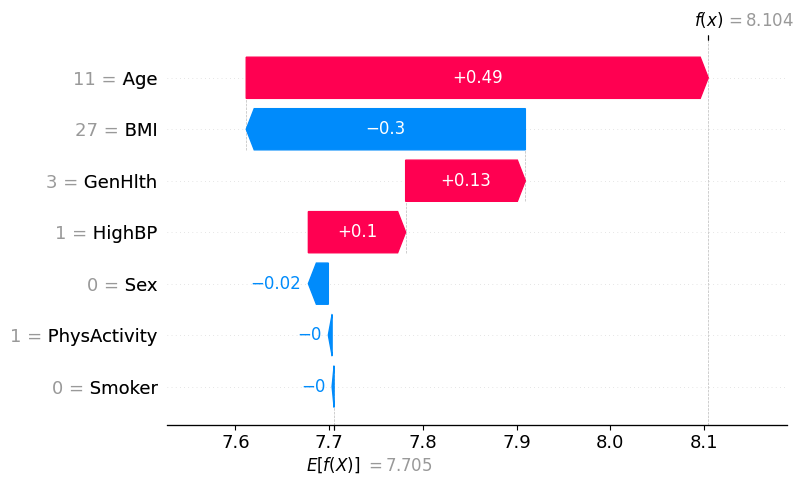

In [14]:
import pandas as pd

# Create a sample of X_train with feature names
X_train_sample_df = pd.DataFrame(X_train_sample, columns=feature_names)

# Recreate the SHAP explainer with the proper DataFrame
explainer = shap.Explainer(linear_svm_model, X_train_sample_df)

# Create the same DataFrame for your single patient
patient_df = pd.DataFrame([patient_input], columns=feature_names)

# Get SHAP values for this single prediction
shap_values = explainer(patient_df)

# Now the plot will show correct feature names
shap.plots.waterfall(shap_values[0])